Step 1: Getting and setting up the data.
Step 2: Visualizing current data.
Step 3: The mathematics behind the Least Squares Method.
Step 4: Using Numpy for a Univariate Linear Regression.
Step 5: Getting the error.
Step 6: Using scikit learn to implement a multivariate regression.
Step 7: Using Training and Validation.  
Step 8: Predicting Prices
Step 9 : Residual Plots

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
import sklearn
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0,0.5,'Count')

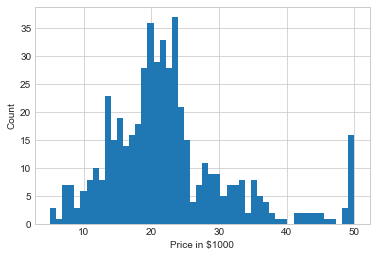

In [5]:
plt.hist(boston.target, bins = 50)

plt.xlabel('Price in $1000')
plt.ylabel('Count')

Text(0.5,0,'Number of rooms')

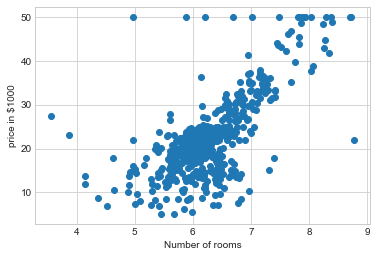

In [6]:
plt.scatter(boston.data[:,5], boston.target)

plt.ylabel('price in $1000')
plt.xlabel('Number of rooms')

In [7]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston_df['Price'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


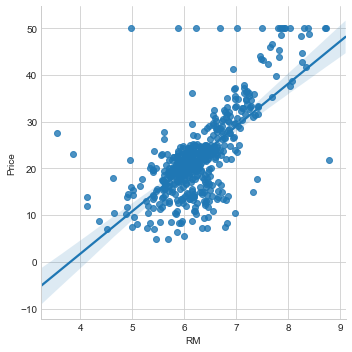

In [9]:
sns.lmplot('RM', 'Price', data = boston_df)

In [10]:
X = boston_df.RM

In [11]:
X = np.vstack(boston_df.RM)

In [12]:
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [13]:
Y = boston_df.Price

In [18]:
new_X = np.array( [[value, 1] for value in X ])

In [19]:
print(new_X[10])

[array([6.377]) 1]


In [21]:
m, b = np.linalg.lstsq(new_X, Y)[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


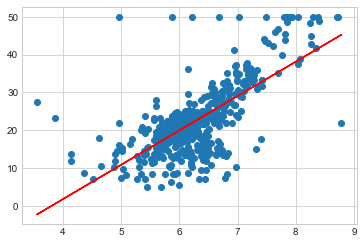

In [22]:
plt.plot(boston_df.RM, boston_df.Price, 'o')

x = boston_df.RM

plt.plot(x, m*x + b, 'r', label = 'Best fit line')

In [25]:
result = np.linalg.lstsq(new_X, Y)

error_total = result[1]

rmse = np.sqrt(error_total/len(x))

print('The Root Mean Square Error is %.2f' %rmse)

The Root Mean Square Error is 6.60


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
X_multi = boston_df.drop('Price', 1)

Y_target = boston_df.Price

In [28]:
lreg = LinearRegression()

In [29]:
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)
print(' The number of coefficients used is %d ' % len(lreg.coef_))

 The estimated intercept coefficient is 36.49 
 The number of coefficients used was 13 


In [31]:
coeff_df = DataFrame(boston_df.columns)

coeff_df.columns = ['Features']

coeff_df['Estimated Coefficient'] = Series(lreg.coef_)

coeff_df

,Features,Estimated Coefficient
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [34]:
import sklearn.model_selection

In [35]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(new_X, boston_df.Price)

In [36]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [37]:
lreg = LinearRegression()

lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
pred_train = lreg.predict(X_train)

pred_test = lreg.predict(X_test)

In [39]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 39.72
Fit a model X_train, and calculate MSE with X_test and Y_test: 55.24


Text(0.5,1,'Residual Plots')

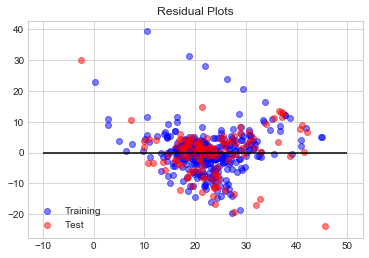

In [40]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')